The points distribution for this case is as follows:

1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (2.5 points)

3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (7.5 points)


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [62]:
df = pd.read_csv('vehicle.csv')

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [64]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [65]:
df = df.fillna(df.median())

In [66]:
desc = df.describe().T

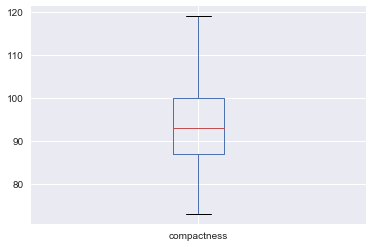

In [67]:
df.boxplot('compactness')

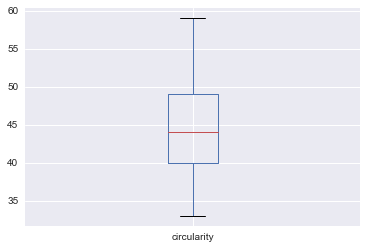

In [68]:
df.boxplot('circularity')

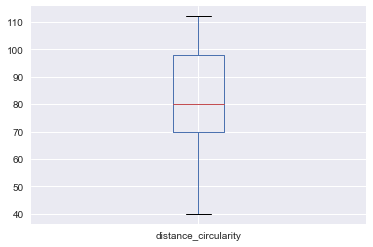

In [69]:
df.boxplot('distance_circularity')

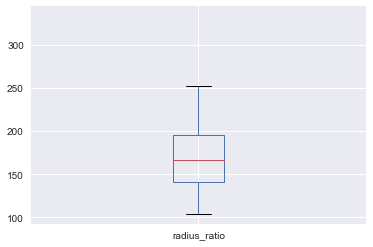

In [70]:
df.boxplot('radius_ratio')

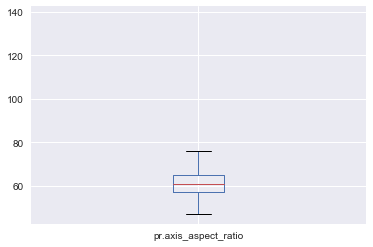

In [71]:
df.boxplot('pr.axis_aspect_ratio')


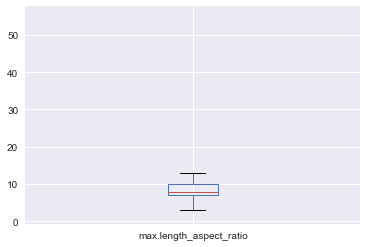

In [72]:
df.boxplot('max.length_aspect_ratio')

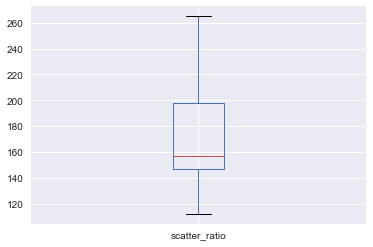

In [73]:
df.boxplot('scatter_ratio')

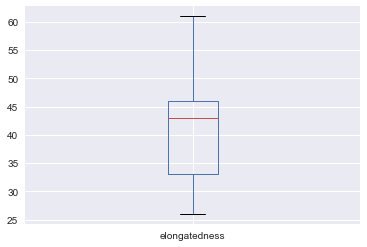

In [74]:
df.boxplot('elongatedness')

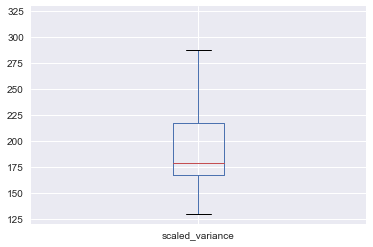

In [75]:
df.boxplot('scaled_variance')

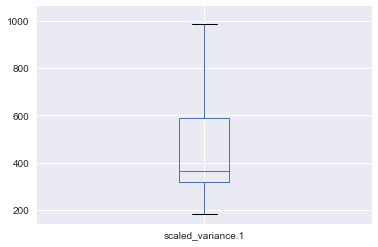

In [76]:
df.boxplot('scaled_variance.1')

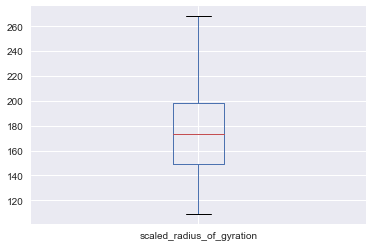

In [77]:
df.boxplot('scaled_radius_of_gyration')

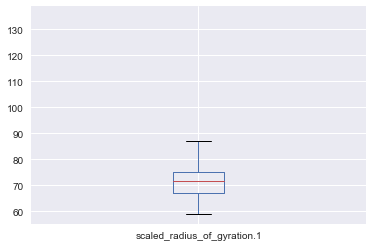

In [78]:
df.boxplot('scaled_radius_of_gyration.1')

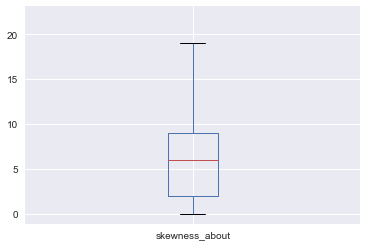

In [79]:
df.boxplot('skewness_about')

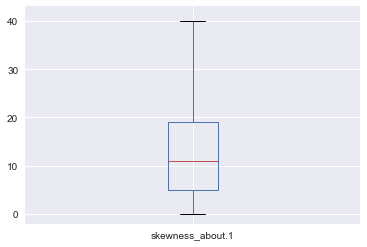

In [80]:
df.boxplot('skewness_about.1')

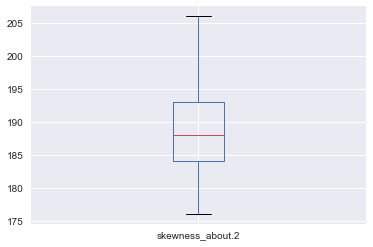

In [81]:
df.boxplot('skewness_about.2')

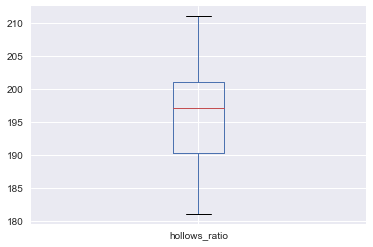

In [82]:
df.boxplot('hollows_ratio')

In [83]:
import seaborn as sns

In [84]:
sns.pairplot(df,diag_kind='kde')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [85]:
desc['iqr'] = desc['75%'] - desc['25%']
desc['lowwhisk'] = desc['25%'] - (1.5*(desc['iqr']))
desc['uppwhisk'] = desc['75%'] + (1.5*(desc['iqr']))

desc

,count,mean,std,min,25%,50%,75%,max,iqr,lowwhisk,uppwhisk
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0,13.00,67.500,119.500
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0,9.00,26.500,62.500
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0,28.00,28.000,140.000
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0,54.00,60.000,276.000
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0,8.00,45.000,77.000
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0,3.00,2.500,14.500
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0,51.00,70.500,274.500
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0,13.00,13.500,65.500
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0,4.00,13.000,29.000
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0,22.00,104.000,192.000


In [86]:
def check_column_for_outliers(colName):
    print("BEFORE checking colName=" + colName + ", number of outliers=" + str(df.loc[df['Outlier'] == 1, 'Outlier'].count()))
    q25 = df[colName].quantile(0.25)
    q75 = df[colName].quantile(0.75)
    iqr = q75 - q25
    _min = q25 - (iqr*1.5)
    _max = q75 + (iqr*1.5)
    
    df.loc[df[colName] < _min, 'Outlier'] = 1
    df.loc[df[colName] > _max, 'Outlier'] = 1
    
    print("AFTER checking colName=" + colName + ", number of outliers=" + str(df.loc[df['Outlier'] == 1, 'Outlier'].count()))
    print()


In [87]:
cols = ['compactness',                    
        'circularity',                   
        'distance_circularity',          
        'radius_ratio',                  
        'pr.axis_aspect_ratio',           
        'max.length_aspect_ratio',        
        'scatter_ratio',                  
        'elongatedness',                  
        'pr.axis_rectangularity',        
        'max.length_rectangularity',     
        'scaled_variance',                
        'scaled_variance.1',              
        'scaled_radius_of_gyration',      
        'scaled_radius_of_gyration.1',    
        'skewness_about',                
        'skewness_about.1',               
        'skewness_about.2',              
        'hollows_ratio'                  
       ]

In [88]:
df['Outlier'] = 0

In [89]:
for col in cols:
    check_column_for_outliers(col)

BEFORE checking colName=compactness, number of outliers=0
AFTER checking colName=compactness, number of outliers=0

BEFORE checking colName=circularity, number of outliers=0
AFTER checking colName=circularity, number of outliers=0

BEFORE checking colName=distance_circularity, number of outliers=0
AFTER checking colName=distance_circularity, number of outliers=0

BEFORE checking colName=radius_ratio, number of outliers=0
AFTER checking colName=radius_ratio, number of outliers=3

BEFORE checking colName=pr.axis_aspect_ratio, number of outliers=3
AFTER checking colName=pr.axis_aspect_ratio, number of outliers=8

BEFORE checking colName=max.length_aspect_ratio, number of outliers=8
AFTER checking colName=max.length_aspect_ratio, number of outliers=13

BEFORE checking colName=scatter_ratio, number of outliers=13
AFTER checking colName=scatter_ratio, number of outliers=13

BEFORE checking colName=elongatedness, number of outliers=13
AFTER checking colName=elongatedness, number of outliers=1

In [90]:
df.drop(df[df.Outlier == 1].index, inplace=True)

In [91]:
df.shape

(813, 20)

In [94]:
corr_matrix = df.corr().abs()

In [95]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [96]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [101]:
to_drop

['elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1']

In [102]:
df.drop(['elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1'],axis = 1, inplace = True)

In [103]:
df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,Outlier
0,95,48.0,83.0,178.0,72.0,10,162.0,184.0,70.0,6.0,16.0,187.0,197,van,0
1,91,41.0,84.0,141.0,57.0,9,149.0,158.0,72.0,9.0,14.0,189.0,199,van,0
2,104,50.0,106.0,209.0,66.0,10,207.0,220.0,73.0,14.0,9.0,188.0,196,car,0
3,93,41.0,82.0,159.0,63.0,9,144.0,127.0,63.0,6.0,10.0,199.0,207,van,0
5,107,44.0,106.0,172.0,50.0,6,255.0,264.0,85.0,5.0,9.0,181.0,183,bus,0


In [104]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [117]:
X = df.iloc[:,0:13]

In [118]:
X 

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,127.0,63.0,6.0,10.0,199.0,207
5,107,44.0,106.0,172.0,50.0,6,255.0,264.0,85.0,5.0,9.0,181.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,112.0,64.0,2.0,14.0,200.0,208
9,93,44.0,98.0,167.0,62.0,11,183.0,152.0,64.0,4.0,14.0,195.0,204
10,86,36.0,70.0,143.0,61.0,9,133.0,127.0,66.0,2.0,10.0,194.0,202


In [119]:
df_X = X.values

In [120]:
df_std = std_scale.fit_transform(df_X)

In [122]:
cols_X = X.columns

In [123]:
df1 = pd.DataFrame(df_std,columns=cols_X)

In [124]:
import numpy as np
Covariance = np.cov(df1.T)
Covariance[0]

array([ 1.00123153,  0.68016403,  0.78779281,  0.74690693,  0.20088144,
        0.49827321,  0.81184064,  0.57839975, -0.25399064,  0.20088711,
        0.16130484,  0.29577741,  0.36460894])

In [125]:
eig_vals, eig_vecs = np.linalg.eig(Covariance)
print(eig_vals)
print(eig_vecs)

[ 5.59435266  3.10197533  1.14700683  1.09743642  0.79501204  0.58254308
  0.28030261  0.17186106  0.08782991  0.02109251  0.03461057  0.05462151
  0.04736531]
[[ -3.64247530e-01   3.09964110e-02  -6.83517066e-02  -1.26972845e-01
   -7.90938431e-02  -4.06111834e-01   5.28557899e-01   4.91531043e-01
   -3.37166472e-01   1.25443459e-02   5.25412508e-02  -1.86714642e-01
    4.41417310e-02]
 [ -3.45529558e-01   2.67907438e-01   1.17156006e-01  -4.13279922e-02
    1.08821512e-01   1.45771077e-02  -3.88480998e-01   2.81264631e-01
   -5.84003428e-02  -1.17817849e-01  -1.20498525e-02   4.89142404e-01
    5.42791275e-01]
 [ -3.93859809e-01   9.28067681e-02  -1.51265150e-01   2.56218464e-02
    5.21142776e-02  -2.09044387e-02   6.05215590e-02  -5.37733641e-01
    1.08627768e-01  -7.16688615e-02  -6.15707738e-02  -5.00271918e-01
    4.95732932e-01]
 [ -3.86086961e-01  -8.27187877e-02   1.53113923e-01   2.02943202e-01
   -2.09395572e-01   1.28402489e-02   1.57966578e-01  -2.68188019e-01
   -5.2598

In [126]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [ ]:
eig_pairs


In [127]:
total = eig_vals.sum()
variance_explained = [(each / total)*100 for each in eig_vals]

In [130]:
variance_explained.sort(reverse=True)

In [131]:
variance_explained

[42.980550311975115,
 23.83199896711001,
 8.8122768906607618,
 8.4314350668428553,
 6.1079550869085892,
 4.4755888436925391,
 2.1535217934833457,
 1.3203820963254229,
 0.67478370577280933,
 0.41964868052886961,
 0.36390041451831473,
 0.26590765536900235,
 0.16205048681236175]

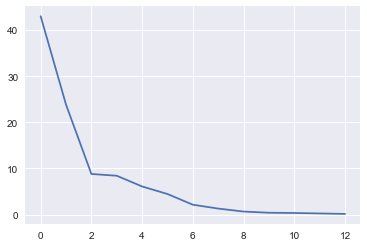

In [129]:
import matplotlib.pyplot as plt
plt.plot(variance_explained)

In [134]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_new=pca.fit_transform(df1)
print (X_new.shape)

(813, 7)


In [139]:
Y = df.iloc[:,13]
Y.head(5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,Y,random_state=1,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(650, 7)
(163, 7)
(650,)
(163,)


In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
tuned_parameters  = {'kernel': ['linear','rbf'], 'C': [0.01, 0.05, 0.5, 1]}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/Users/himanshudobhal/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/himanshudobhal/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/himanshudobhal/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/himanshudobhal/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average

Best parameters set found on development set:

{'C': 1, 'kernel': 'rbf'}

Grid scores on development set:

0.752 (+/-0.075) for {'C': 0.01, 'kernel': 'linear'}
0.170 (+/-0.001) for {'C': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.067) for {'C': 0.05, 'kernel': 'linear'}
0.508 (+/-0.429) for {'C': 0.05, 'kernel': 'rbf'}
0.782 (+/-0.039) for {'C': 0.5, 'kernel': 'linear'}
0.898 (+/-0.040) for {'C': 0.5, 'kernel': 'rbf'}
0.780 (+/-0.045) for {'C': 1, 'kernel': 'linear'}
0.905 (+/-0.034) for {'C': 1, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        bus       0.96      0.94      0.95        53
        car       0.91      0.95      0.93        84
        van       0.83      0.73      0.78        26

avg / total       0.91      0.91      0.91       163


# Tuning hyper-parameters for recall

Best parameters set found on development set:

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X_train,y_train , cv=5)
print(scores)

[ 0.91603053  0.88549618  0.92307692  0.90697674  0.89147287]
